#RF

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


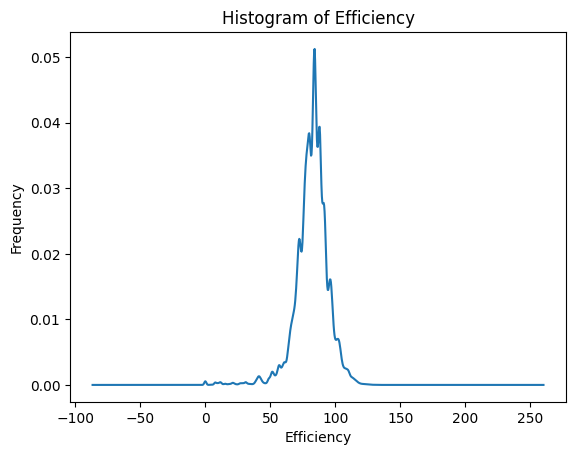

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer

data_folder = '/content/drive/MyDrive/2months_data'
all_files = os.listdir(data_folder)
csv_files = [os.path.join(data_folder, f) for f in all_files if f.endswith('.csv')]

def read_csv_file(file_path):
    encodings = ['utf-8', 'cp949', 'euc-kr']  # List of possible encodings
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding)
        except (UnicodeDecodeError, pd.errors.EmptyDataError, pd.errors.ParserError):
            continue
    raise ValueError(f"Could not read file {file_path} with any encoding.")

valid_dataframes = []
for file in csv_files:
    try:
        df = read_csv_file(file)
        if not df.empty:
          valid_dataframes.append(df)
    except ValueError as e:
        print(e)

if valid_dataframes:
    combined_data = pd.concat(valid_dataframes, ignore_index=True)
else:
    combined_data = pd.DataFrame()
combined_data.columns=["Creation date", "load factor", "Set Pressure", "Boiler Pressure",
                      "Blower Inverter Output", "Blower Input", "Water Supply Pump",
                      "Water Supply Pump Input", "Gas Damper", "Gas Damper Input",
                      "Air Damper", "Air Damper Input", "Recirculation Damper",
                      "Recirculation External Damper", "Recirculation Damper Input",
                      "Recirculation External Damper Input", "Water Supply Level",
                      "Boiler Temperature", "Exhaust Gas Temperature 1",
                      "Exhaust Gas Temperature 2", "Exhaust Gas Temperature 3",
                      "Exhaust Recirculation Temperature", "Economizer Temperature 1",
                      "Economizer Temperature 2", "Burner Temperature", "Exhaust Gas NOx",
                      "Exhaust Gas O2", "Recirculation O2", "Recirculation NOx",
                      "Water Supply Amount (Cumulative Flow)",
                      "Water Supply Amount (Instantaneous Flow)",
                      "Fuel Amount (Cumulative Flow)", "Fuel Amount (Instantaneous Flow)",
                      "Efficiency (Instantaneous)", "Power Consumption", "Vibration Sensor 1",
                      "Vibration Sensor 2", "Operating Time", "Normal Operation Probability",
                      "Blower Failure Probability", "Air Damper Failure Probability",
                      "Gas Damper Failure Probability", "Probability Update Time",
                      "Instantaneous Steam Amount", "Input-Output Efficiency",
                      "Heat Loss Efficiency", "Efficiency (input/output method-steam)"]

combined_data = combined_data.reset_index()
combined_data = combined_data.shift(periods=1, axis=1)
combined_data = combined_data.drop(columns=['index'])
combined_data = combined_data[combined_data['load factor'] != 0]

combined_data = combined_data.drop(columns=[
    "Creation date","Power Consumption","Vibration Sensor 1","Vibration Sensor 2","Operating Time",
    "Normal Operation Probability","Blower Failure Probability","Air Damper Failure Probability",
    "Gas Damper Failure Probability","Probability Update Time","Instantaneous Steam Amount",
    "Input-Output Efficiency","Heat Loss Efficiency","Efficiency (Instantaneous)",
    "Exhaust Recirculation Temperature","Burner Temperature"
])

numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numeric_columns] = combined_data[numeric_columns].apply(lambda col: col.fillna(col.mean()))

# scaler = StandardScaler()
# combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# # Encode categorical variables (if any)
# label_encoder = LabelEncoder()
# for column in combined_data.select_dtypes(include=['object']).columns:
#     combined_data[column] = label_encoder.fit_transform(combined_data[column])

# combined_data.to_csv('/content/drive/MyDrive/preprocessed_boiler_data.csv', index=False, encoding='utf-8')


import matplotlib.pyplot as plt

# 히스토그램
combined_data['Efficiency (input/output method-steam)'].plot(kind='density')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()
combined_data = combined_data[combined_data['load factor'] != 0]

In [ ]:
combined_data

,load factor,Set Pressure,Boiler Pressure,Blower Inverter Output,Blower Input,Water Supply Pump,Water Supply Pump Input,Gas Damper,Gas Damper Input,Air Damper,...,Economizer Temperature 2,Exhaust Gas NOx,Exhaust Gas O2,Recirculation O2,Recirculation NOx,Water Supply Amount (Cumulative Flow),Water Supply Amount (Instantaneous Flow),Fuel Amount (Cumulative Flow),Fuel Amount (Instantaneous Flow),Efficiency (input/output method-steam)
0,-1.333333,0.0,2.0,-1.575758,-1.573171,-1.0,0.0,-0.571429,-0.597143,-0.62500,...,-1.368421,-1.25,0.909091,0.0,0.0,0.631448,-0.752688,0.646639,-1.079787,-1.275646
1,-1.333333,0.0,2.0,-1.575758,-1.567073,-1.0,0.0,-0.571429,-0.591429,-0.62500,...,-1.368421,-1.50,0.909091,0.0,0.0,0.631448,-0.752688,0.646639,-1.081560,-1.267032
2,-1.666667,0.0,2.0,-1.939394,-1.573171,-1.0,0.0,-0.714286,-0.588571,-0.78125,...,-1.368421,-1.50,0.909091,0.0,0.0,0.631448,-0.752688,0.646639,-1.083333,-1.259201
3,-1.666667,0.0,2.0,-1.939394,-1.670732,-1.0,0.0,-0.714286,-0.591429,-0.78125,...,-1.368421,-1.50,0.909091,0.0,0.0,0.631448,-0.752688,0.646639,-1.090426,-1.225529
4,-1.666667,0.0,2.0,-1.939394,-1.792683,-1.0,0.0,-0.714286,-0.722857,-0.78125,...,-1.385965,-1.50,0.909091,0.0,0.0,0.631448,-0.752688,0.646639,-1.108156,-1.139389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083406,0.000000,0.0,0.0,0.121212,0.121951,-1.0,0.0,0.285714,0.151429,0.46875,...,-0.789474,-1.00,0.545455,0.0,0.0,-0.564692,0.050179,-0.556284,0.202128,0.328113
1083407,0.000000,0.0,0.0,0.000000,0.115854,0.0,0.0,0.000000,0.222857,0.00000,...,-0.789474,-1.50,0.727273,0.0,0.0,-0.564692,0.050179,-0.556284,0.124113,0.557557
1083408,0.000000,0.0,0.0,0.000000,0.012195,0.0,0.0,0.000000,0.205714,0.00000,...,-0.789474,-1.00,0.818182,0.0,0.0,-0.564692,0.050179,-0.556284,0.012411,0.914644
1083409,0.000000,0.0,0.0,0.000000,-0.006098,0.0,0.0,0.000000,0.108571,0.00000,...,-0.789474,-1.75,0.818182,0.0,0.0,-0.564692,0.050179,-0.556284,0.012411,0.523101


In [ ]:
scaler = RobustScaler()
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

combined_data.to_csv('/content/drive/MyDrive/preprocessed_boiler_data.csv', index=False, encoding='utf-8')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# combined_data = 전처리된 데이터프레임 (전처리 코드는 이미 실행된 상태라고 가정)
combined_data = read_csv_file('/content/drive/MyDrive/preprocessed_boiler_data.csv')

# 독립 변수(X)와 종속 변수(y) 설정
X = combined_data.drop(columns=['Efficiency (input/output method-steam)'])  # 종속 변수 제외
y = combined_data['Efficiency (input/output method-steam)']

# 데이터 분할: 훈련 데이터와 테스트 데이터로 분할
# 여기에서 train_test_split을 사용하여 X_train, X_test, y_train, y_test를 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 예시: 80% 훈련, 20% 테스트

# Random Forest Model with RandomizedSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 15, 20, 25],           # Maximum depth of the tree
    'min_samples_split': [2,5,10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4],    # Minimum number of samples required to be at a leaf node
    'max_features':['sqrt', 'log2'],  # Number of features to consider at each split
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]  # 리프 노드의 가중치 샘플 최소값
}

# Randomized Search CV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Model evaluation using test data
y_pred = random_search.predict(X_test)

# Calculate performance metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mse = np.mean((y_test - y_pred) ** 2)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters found by RandomizedSearchCV:
{'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
MAPE: inf
MAE: 0.2781
RMSE: 0.3899
MSE: 0.1520


# XGBoost

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.1 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import drive

# Google Drive를 마운트
drive.mount('/content/drive')

# 데이터 폴더 경로 설정
data_folder_2 = '/content/drive/MyDrive/3months_data'
all_files_2 = os.listdir(data_folder_2)
csv_files_2 = [os.path.join(data_folder_2, f) for f in all_files_2 if f.endswith('.csv')]

# CSV 파일을 다양한 인코딩으로 읽기 시도
def read_csv_file_2(file_path):
    encodings = ['utf-8', 'cp949', 'euc-kr']
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding)
        except (UnicodeDecodeError, pd.errors.EmptyDataError, pd.errors.ParserError):
            continue
    raise ValueError(f"Could not read file {file_path} with any encoding.")

# 유효한 데이터프레임 수집
valid_dataframes_2 = []
for file in csv_files_2:
    try:
        df_2 = read_csv_file_2(file)
        if not df_2.empty:
            valid_dataframes_2.append(df_2)
        else:
            print(f"File '{file}' is empty and will be skipped.")
    except ValueError as e:
        print(e)

# 유효한 DataFrame 결합
if valid_dataframes_2:
    combined_data_2 = pd.concat(valid_dataframes_2, ignore_index=True)
else:
    combined_data_2 = pd.DataFrame()  # 유효한 파일이 없으면 빈 DataFrame 생성

# 컬럼명 정의
combined_data_2.columns = [
    "생성일", "부하율", "설정 압력", "보일러 압력", "송풍기 인버터 출력", "송풍기 입력",
    "급수 펌프", "급수펌프 입력", "가스 댐퍼", "가스 댐퍼 입력", "Air 댐퍼", "Air 댐퍼 입력",
    "재순환 댐퍼", "재순환 외기 댐퍼", "재순환 댐퍼 입력", "재순환 외기 댐퍼 입력", "급수 수위",
    "보일러 온도", "배기가스온도1", "배기가스온도2", "배기가스온도3", "배기 재 순환 온도",
    "에코 온도1", "에코 온도2", "버너온도", "배기가스 NOx", "배기가스 O2", "재순환 O2",
    "재순환 NOx", "급수량(적산유량)", "급수량(순간유량)", "연료량(적산유량)", "연료량(순간유량)",
    "효율(순간)", "소비전류", "진동센서1", "진동센서2", "운전시간", "정상 운전 확률",
    "송풍기 고장 확률", "AIR 댐퍼 고장 확률", "GAS 앰퍼 고장 확률", "확률 업데이트 시간",
    "순간 스팀량", "입출력법 효율", "열 손실법 효율", "효율(입출력법-스팀)"
]

# 데이터 전처리
combined_data_2 = combined_data_2.reset_index()
combined_data_2 = combined_data_2.shift(periods=1, axis=1)
combined_data_2 = combined_data_2.drop(columns=['index'])
combined_data_2 = combined_data_2[combined_data_2['부하율'] != 0]

# 불필요한 열 드롭
combined_data_2 = combined_data_2.drop(columns=[
    "생성일", "소비전류", "진동센서1", "진동센서2", "운전시간", "정상 운전 확률",
    "송풍기 고장 확률", "AIR 댐퍼 고장 확률", "GAS 앰퍼 고장 확률", "확률 업데이트 시간",
    "순간 스팀량", "입출력법 효율", "열 손실법 효율", "배기 재 순환 온도", "버너온도"
])

# 수치형 데이터 스케일링 및 결측값 처리
scaler_2 = StandardScaler()
numeric_columns_2 = combined_data_2.select_dtypes(include=['float64', 'int64']).columns
combined_data_2[numeric_columns_2] = scaler_2.fit_transform(combined_data_2[numeric_columns_2])

# 결측값 처리
numerical_columns_2 = combined_data_2.select_dtypes(include=['float64', 'int64']).columns
combined_data_2[numerical_columns_2] = combined_data_2[numerical_columns_2].apply(lambda col: col.fillna(col.mean()))

# object 타입 열 확인 후 SimpleImputer 적용
object_columns = combined_data_2.select_dtypes(include=['object']).columns
if not object_columns.empty:
    cat_imputer_2 = SimpleImputer(strategy='most_frequent')
    combined_data_2[object_columns] = cat_imputer_2.fit_transform(combined_data_2[object_columns])

# Label Encoding
label_encoder_2 = LabelEncoder()
for column in object_columns:
    combined_data_2[column] = label_encoder_2.fit_transform(combined_data_2[column])

# 타겟 변수와 특징 변수 분리
X_2 = combined_data_2.drop(columns=['효율(입출력법-스팀)'])
y_2 = combined_data_2['효율(입출력법-스팀)']

# 범주형 변수를 One-Hot Encoding으로 변환
X_encoded_2 = pd.get_dummies(X_2)

# 학습 데이터와 테스트 데이터로 분리
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_encoded_2, y_2, test_size=0.2, random_state=42)

# XGBoost 모델 초기화 및 하이퍼파라미터 튜닝
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model_2 = xgb.XGBRegressor(objective='reg:squarederror')
param_dist_2 = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}

# Randomized Search CV로 하이퍼파라미터 최적화
random_search_2 = RandomizedSearchCV(
    xgb_model_2,
    param_distributions=param_dist_2,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_2.fit(X_train_2, y_train_2)

# 최적의 하이퍼파라미터 및 성능 평가
print("최적의 하이퍼파라미터:", random_search_2.best_params_)

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_2 = random_search_2.predict(X_test_2)

mse_2 = mean_squared_error(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)
mape_2 = np.mean(np.abs((y_test_2 - y_pred_2) / y_test_2)) * 100

print(f'테스트 데이터 MSE: {mse_2}')
print(f'테스트 데이터 MAE: {mae_2}')
print(f'테스트 데이터 RMSE: {rmse_2}')
print(f'테스트 데이터 MAPE: {mape_2:.2f}%')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File '/content/drive/MyDrive/3months_data/28_2024-07-25.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-26.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-27.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-28.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-29.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-30.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-07-31.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-08-01.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-08-02.csv' is empty and will be skipped.
File '/content/drive/MyDrive/3months_data/28_2024-08

<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-5439d4920453>:42: UserWarning: Glyph 47049 (\

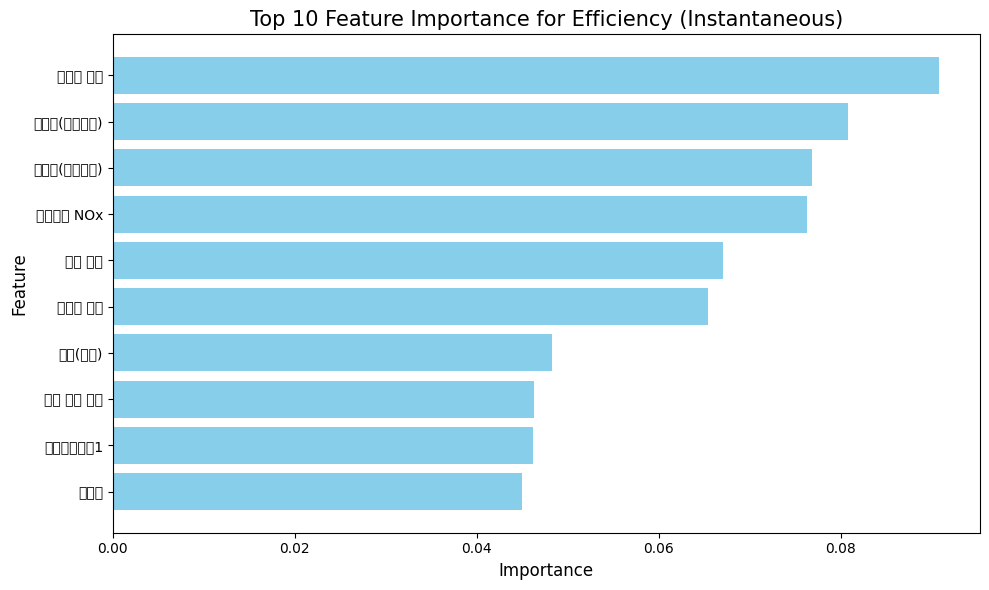

      Feature  Importance
14     보일러 압력    0.090793
23  연료량(적산유량)    0.080833
7   급수량(적산유량)    0.076860
9    배기가스 NOx    0.076323
4       급수 수위    0.067077
15     보일러 온도    0.065400
30     효율(순간)    0.048320
3    가스 댐퍼 입력    0.046324
11    배기가스온도1    0.046189
16        부하율    0.044974


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# RandomizedSearchCV 객체에서 최적의 모델 가져오기
best_model = random_search_2.best_estimator_

# 최적의 모델에서 특성 중요도 가져오기
feature_importances_2 = best_model.feature_importances_

# 특성 이름과 중요도를 DataFrame으로 변환
importance_df_2 = pd.DataFrame({
    'Feature': X_encoded_2.columns,
    'Importance': feature_importances_2
})

# 특성 이름을 한글에서 영어로 변경
feature_mapping_2 = {
    # (특성 이름 매핑은 그대로 유지합니다)
}

# 특성 이름 변경
importance_df_2['Feature'] = importance_df_2['Feature'].replace(feature_mapping_2)

# 특성 이름에서 날짜나 시간 정보 등 불필요한 부분 제거
importance_df_2['Feature'] = importance_df_2['Feature'].apply(lambda x: re.sub(r'(_\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})|(_\d+:\d+)', '', x))

# 동일한 특성 이름들의 중요도를 합산
importance_df_2 = importance_df_2.groupby('Feature', as_index=False).sum()

# 상위 N개의 중요도만 필터링
top_n = 10
top_features_2 = importance_df_2.sort_values(by='Importance', ascending=False).head(top_n)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_features_2['Feature'], top_features_2['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # 중요도가 높은 순서부터 표시
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Feature Importance for Efficiency (Instantaneous)', fontsize=15)
plt.tight_layout()
plt.show()

# 출력할 때 특성 이름과 중요도만 포함하여 확인
print(top_features_2[['Feature', 'Importance']])


In [ ]:
combined_data_2

,부하율,설정 압력,보일러 압력,송풍기 인버터 출력,송풍기 입력,급수 펌프,급수펌프 입력,가스 댐퍼,가스 댐퍼 입력,Air 댐퍼,...,배기가스 NOx,배기가스 O2,재순환 O2,재순환 NOx,급수량(적산유량),급수량(순간유량),연료량(적산유량),연료량(순간유량),효율(순간),효율(입출력법-스팀)
0,-2.085028,2.042810e-14,1.927076,-2.443819,-2.484893,0.880399,0.0,-1.564798,-1.615819,-1.702448,...,0.456547,1.702148,0.0,0.0,-1.632517,0.772291,-1.638500,-2.220148,3.562631,2.639936e-15
1,-1.582457,2.042810e-14,1.421171,-2.443819,-2.484893,0.880399,0.0,-1.564798,-1.599891,-1.702448,...,0.456547,1.837353,0.0,0.0,-1.632517,1.110318,-1.638485,-2.220148,4.393000,2.639936e-15
2,-1.582457,2.042810e-14,1.421171,-1.922443,-2.467246,0.880399,0.0,-1.302362,-1.610510,-1.403242,...,0.761950,1.837353,0.0,0.0,-1.632517,1.110318,-1.638485,-2.217095,4.381169,2.639936e-15
3,-1.582457,2.042810e-14,1.421171,-1.922443,-1.955502,0.880399,0.0,-1.302362,-1.382208,-1.403242,...,0.151144,1.837353,0.0,0.0,-1.632508,1.116818,-1.638485,-2.220148,4.409006,2.639936e-15
4,-1.582457,2.042810e-14,1.421171,-1.922443,-1.946678,0.880399,0.0,-1.302362,-1.350352,-1.403242,...,0.456547,1.837353,0.0,0.0,-1.632508,1.116818,-1.638485,-2.226252,4.435800,2.639936e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602054,0.930403,2.042810e-14,-0.602450,0.945123,0.956149,-1.135722,0.0,1.059560,1.033548,1.110091,...,0.151144,1.026124,0.0,0.0,1.372053,0.005231,1.371442,0.969680,-0.210160,-5.161522e-02
3602055,0.930403,2.042810e-14,-0.602450,0.945123,0.956149,-1.135722,0.0,1.059560,1.022929,1.110091,...,0.151144,1.026124,0.0,0.0,1.372053,0.005231,1.371442,0.945260,-0.205752,3.161456e-01
3602056,0.930403,2.042810e-14,-0.602450,0.945123,0.956149,0.880399,0.0,1.059560,1.017620,1.110091,...,-0.459663,1.026124,0.0,0.0,1.372053,-0.982846,1.371442,0.969680,-0.934630,2.789654e-01
3602057,0.930403,2.042810e-14,-0.602450,0.945123,0.956149,0.880399,0.0,1.059560,1.028238,1.110091,...,-0.154260,0.890919,0.0,0.0,1.372053,-1.125857,1.371442,0.981890,-1.037861,2.611835e-01


# 비교

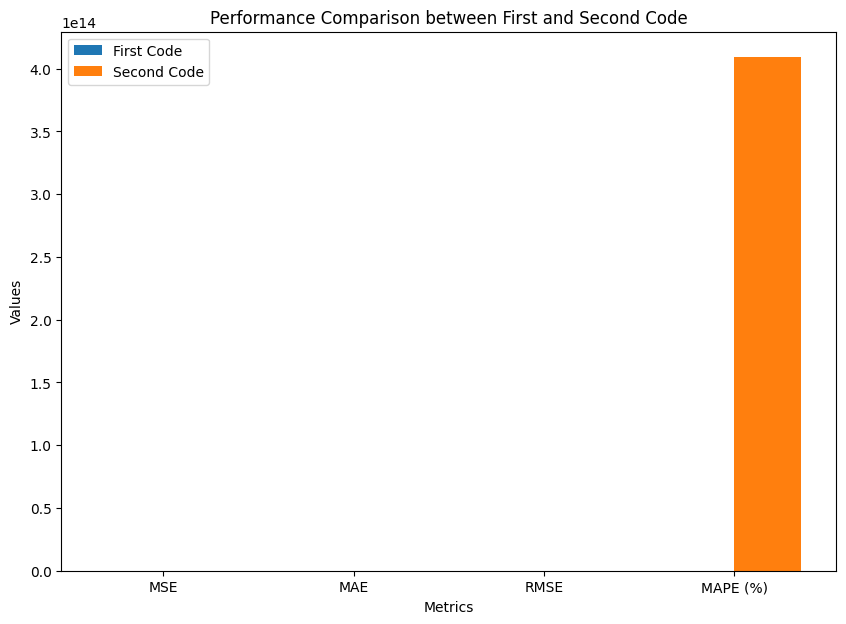

In [ ]:
first_code_metrics = [mse, mae, rmse, mape]
second_code_metrics = [mse_2, mae_2, rmse_2, mape_2]
metrics_labels = ['MSE', 'MAE', 'RMSE', 'MAPE (%)']

# 그래프 시각화
bar_width = 0.35
x = np.arange(len(metrics_labels))

plt.figure(figsize=(10, 7))
plt.bar(x, first_code_metrics, width=bar_width, label='First Code')
plt.bar(x + bar_width, second_code_metrics, width=bar_width, label='Second Code')

# 그래프 디테일 설정
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Comparison between First and Second Code')
plt.xticks(x + bar_width / 2, metrics_labels)
plt.legend()

plt.show()

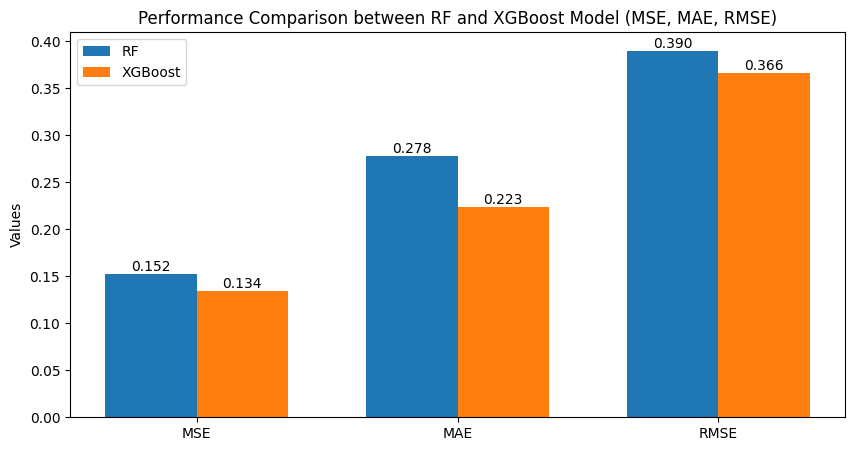

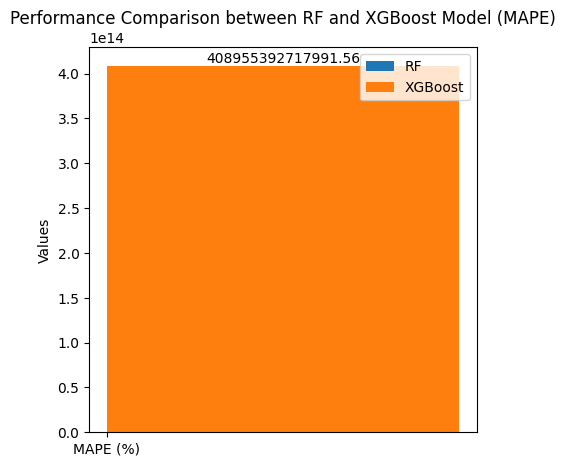

In [ ]:
# MSE, MAE, RMSE 값만 리스트로 구성
first_code_metrics_main = [mse, mae, rmse]
second_code_metrics_main = [mse_2, mae_2, rmse_2]
metrics_labels_main = ['MSE', 'MAE', 'RMSE']

# MAPE 값만 별도 리스트로 구성
first_code_mape = [mape]
second_code_mape = [mape_2]
metrics_labels_mape = ['MAPE (%)']

# MSE, MAE, RMSE 그래프
plt.figure(figsize=(10, 5))
bar_width = 0.35
x_main = np.arange(len(metrics_labels_main))

# 막대 그래프 생성
bars1 = plt.bar(x_main, first_code_metrics_main, width=bar_width, label='RF')
bars2 = plt.bar(x_main + bar_width, second_code_metrics_main, width=bar_width, label='XGBoost')

# 각 막대 위에 수치를 표시
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# 그래프 제목 설정 및 축 레이블 제거
plt.ylabel('Values')
plt.title('Performance Comparison between RF and XGBoost Model (MSE, MAE, RMSE)')
plt.xticks(x_main + bar_width / 2, metrics_labels_main)
plt.legend()
plt.show()

# MAPE 그래프
plt.figure(figsize=(5, 5))
x_mape = np.arange(len(metrics_labels_mape))

# 막대 그래프 생성
bars1 = plt.bar(x_mape, first_code_mape, width=bar_width, label='RF')
bars2 = plt.bar(x_mape + bar_width, second_code_mape, width=bar_width, label='XGBoost')

# 각 막대 위에 수치를 표시
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# 그래프 제목 설정 및 축 레이블 제거
plt.ylabel('Values')
plt.title('Performance Comparison between RF and XGBoost Model (MAPE)')
plt.xticks(x_mape + bar_width / 2, metrics_labels_mape)
plt.legend()
plt.show()